## Advanced Regression Assignment

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 15)

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

### Data Understanding and Exploration

In [4]:
# seperating the categorical variables to understand the distribution/Skewness
mylist=[]

for i in df.columns:
    if df[i].dtype=='O':
        mylist.append(i)

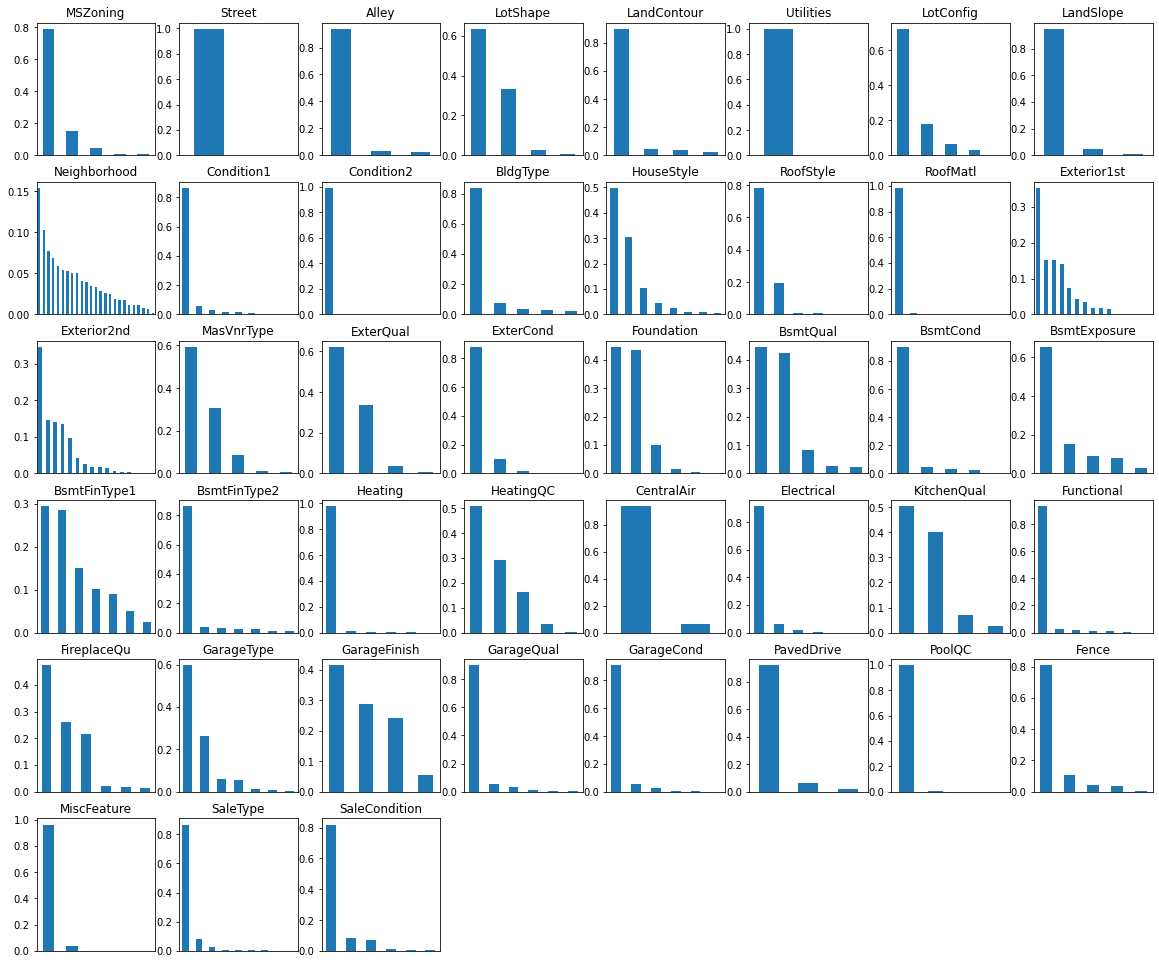

In [5]:
plt.figure(figsize=(20,20))
for j in enumerate(mylist):
    plt.subplot(7,8,j[0]+1)
    df[j[1]].value_counts(normalize=True,dropna=False).plot(kind='bar')
    plt.xticks([])
    plt.title(j[1])
    

Observation: There are few columns categories weighed more then 80%, so going to drop those columns in data cleaning section.

In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,...,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,...,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,...,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,...,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,...,0,0,0,0,12,2008,250000


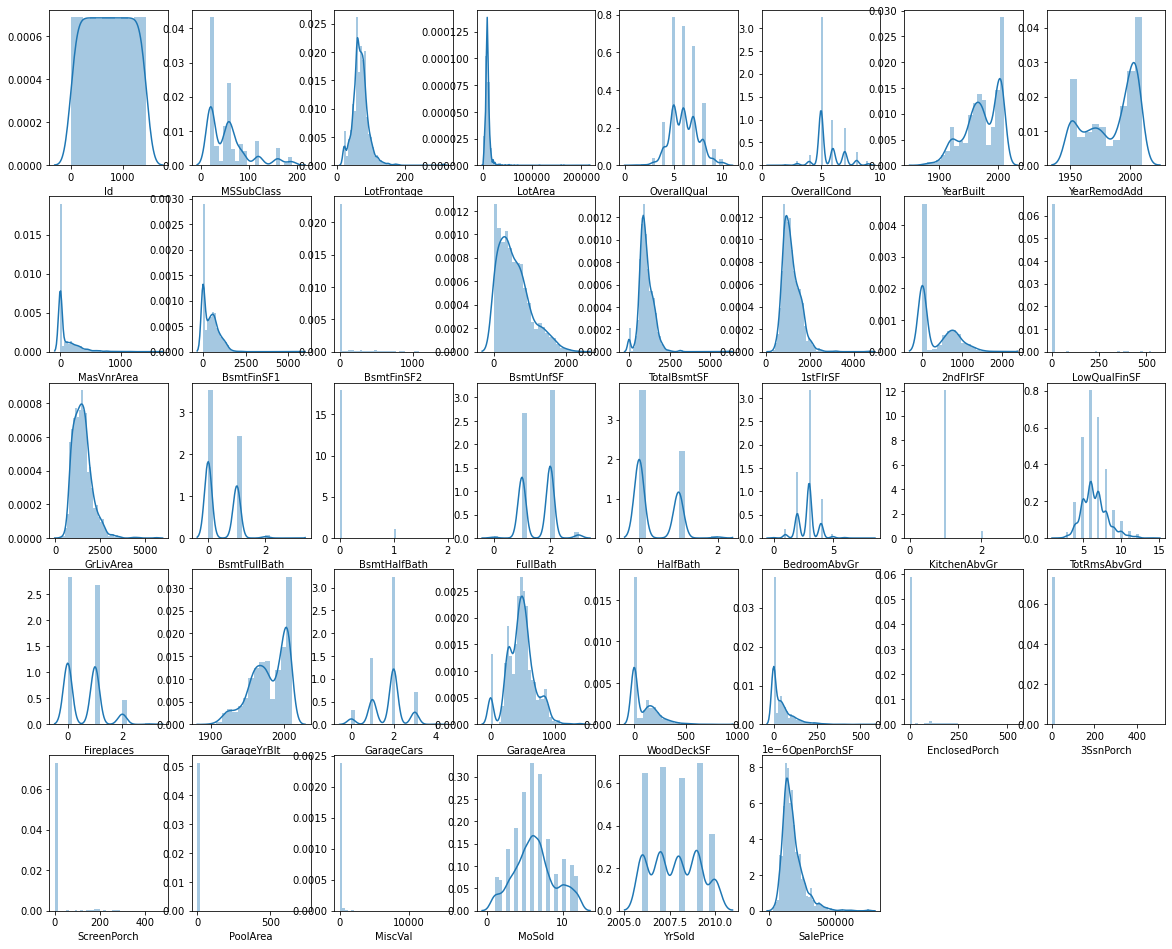

In [7]:
plt.figure(figsize=(20,20))
for j in enumerate(df_numeric.columns):
    plt.subplot(6,8,j[0]+1)
    sns.distplot(df[j[1]])
    
    
    

Observation: There are few numerical columns has unique values or over skewed, going to drop those columns.

### Data Cleaning & Preparation

In [8]:
#listing the categorical columns to be dropped 
drop_list=[]
for i in mylist:
    if df[i].value_counts(normalize=True,dropna=False)[0] > 0.8:
        drop_list.append(i)

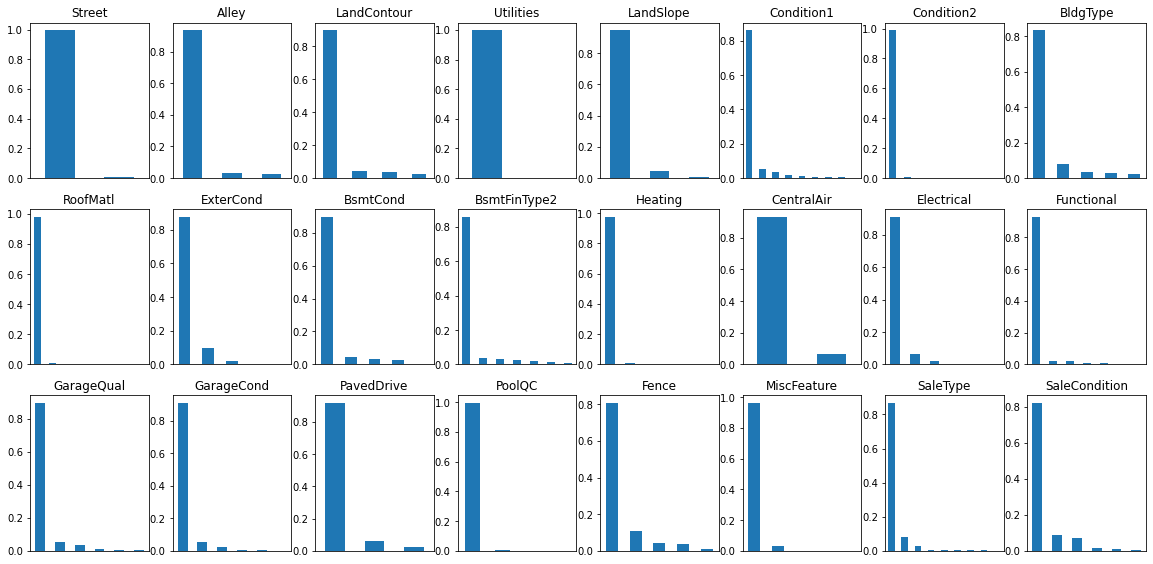

In [9]:
# Categorical cols with Skewness in the value more than 80%
plt.figure(figsize=(20,20))
for j in enumerate(drop_list):
    plt.subplot(6,8,j[0]+1)
    df[j[1]].value_counts(normalize=True,dropna=False).plot(kind='bar')
    plt.xticks([])
    plt.title(j[1])
    

In [10]:
#dropping the unnecessary categorical columns
df.drop(columns=drop_list,axis=1,inplace=True)

In [11]:
#aggrefating the total full bathrooms and half bathrooms
df['Full Bathrooms']=df.BsmtFullBath+df.FullBath
df['Half Bathrooms']=df.BsmtHalfBath+df.HalfBath

In [12]:
#type converting from integer to string 
type_c=['MSSubClass','OverallQual','OverallCond','Fireplaces','GarageCars','Full Bathrooms','Half Bathrooms','BedroomAbvGr','TotRmsAbvGrd']
for i in type_c:
    df[i]=df[i].astype(str)
    

In [13]:
#calculating the age of house in days
df['Age_Days']=round((df.YrSold-df.YearBuilt+(df.MoSold/12))*365,0)

In [14]:
#creating new column whether the house is remodelled or not
df.loc[df.YearRemodAdd>df.YearBuilt,'Remodeled']='1'
df.loc[df.YearRemodAdd==df.YearBuilt,'Remodeled']='0'

In [15]:
#dropping the numerical columns based on the skewness and columns used for deriving new columns
df.drop(columns=['Id','PoolArea','MiscVal','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','YearRemodAdd','GarageYrBlt','MoSold','YrSold','YearBuilt','EnclosedPorch', '3SsnPorch', 'ScreenPorch','LowQualFinSF','KitchenAbvGr','BsmtFinSF2','MasVnrArea', 'BsmtFinSF1','BsmtUnfSF','2ndFlrSF','WoodDeckSF', 'OpenPorchSF'],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   LotShape        1460 non-null   object 
 5   LotConfig       1460 non-null   object 
 6   Neighborhood    1460 non-null   object 
 7   HouseStyle      1460 non-null   object 
 8   OverallQual     1460 non-null   object 
 9   OverallCond     1460 non-null   object 
 10  RoofStyle       1460 non-null   object 
 11  Exterior1st     1460 non-null   object 
 12  Exterior2nd     1460 non-null   object 
 13  MasVnrType      1452 non-null   object 
 14  ExterQual       1460 non-null   object 
 15  Foundation      1460 non-null   object 
 16  BsmtQual        1423 non-null   object 
 17  BsmtExposure    1422 non-null   o

In [17]:
#checking if any column has more than 40% missing values
df.isnull().sum()[df.isnull().sum()*100/len(df) >40].index

Index(['FireplaceQu'], dtype='object')

In [18]:
# droping the resultant columns based on above criteria 
df.drop(columns='FireplaceQu',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   LotShape        1460 non-null   object 
 5   LotConfig       1460 non-null   object 
 6   Neighborhood    1460 non-null   object 
 7   HouseStyle      1460 non-null   object 
 8   OverallQual     1460 non-null   object 
 9   OverallCond     1460 non-null   object 
 10  RoofStyle       1460 non-null   object 
 11  Exterior1st     1460 non-null   object 
 12  Exterior2nd     1460 non-null   object 
 13  MasVnrType      1452 non-null   object 
 14  ExterQual       1460 non-null   object 
 15  Foundation      1460 non-null   object 
 16  BsmtQual        1423 non-null   object 
 17  BsmtExposure    1422 non-null   o

In [20]:
#filling NA's with No Basement and No Garage as 'NB' and 'NG'
df.BsmtQual.fillna('NB',inplace=True)
df.BsmtExposure.fillna('NB',inplace=True)
df.BsmtFinType1.fillna('NB',inplace=True)
df.GarageType.fillna('NG',inplace=True)
df.GarageFinish.fillna('NG',inplace=True)
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)

In [21]:
#filling NA's with median for below cols
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)

In [22]:
# Cleaned all the missing info
df.isnull().sum().sum()

0

In [23]:
#Creating new list for understanding distribution of categorical columns vs target variable
mylist=[]

for i in df.columns:
    if df[i].dtype=='O':
        mylist.append(i)

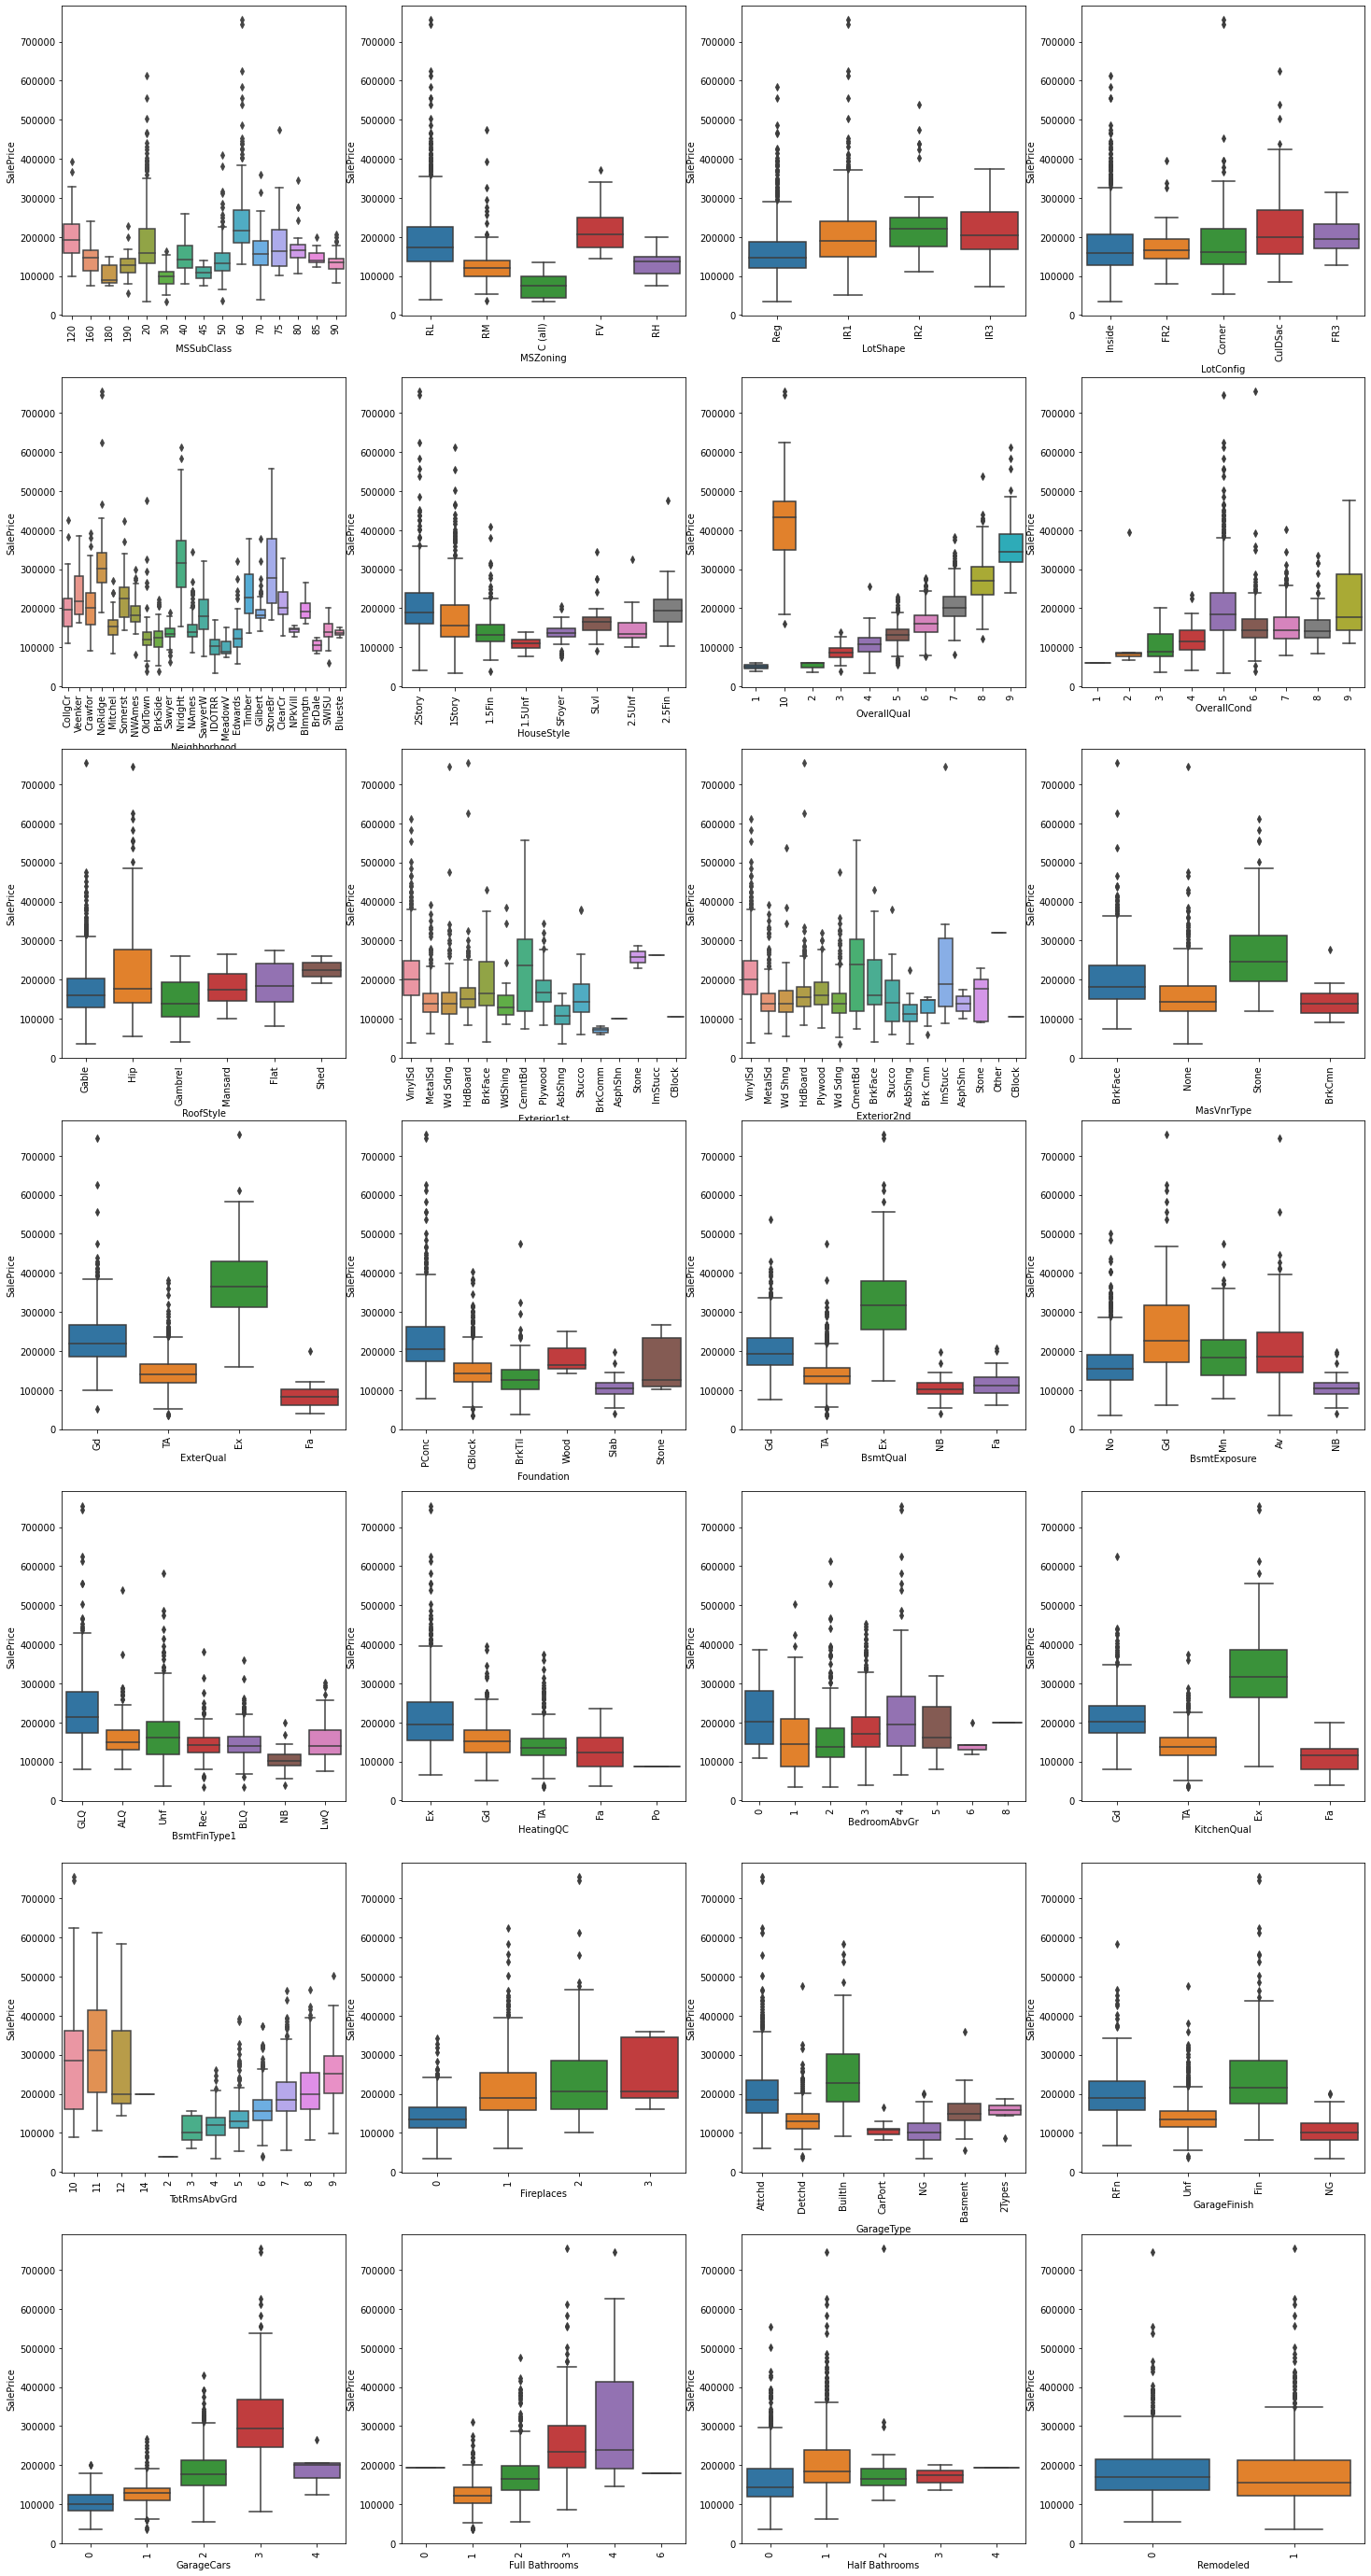

In [24]:
# Distribution of Categorical Cols vs Target variable
plt.figure(figsize=(25,50))
for j in enumerate(mylist):
    plt.subplot(7,4,j[0]+1)
    
    plt.xticks(rotation=90)
    sns.boxplot(y='SalePrice',x=j[1],data=df, orient='v')
    
    

Observation: 
    1. 2-STORY 1946 & NEWER type of dwelling has high market value and least for PUD - MULTILEVEL INCL SPLIT LEV/FOYER type.
    2. Floating Village Residential zone has mode demand than Residential Low Density and least for commercial zone.
    3. Prices for Irregular homes are higher than regular homes.
    4. Cul-de-sac and Frontage on 3 sides of property prices are little higher than others.
    5. Prices are higher if the neighbourhood is Northridge Heights and Stone Brook.
    6. Housing style : One and one-half story: 2nd level unfinished has least pricing.
    7. Prices are higher for Excellent External Quality, Poured Contrete foundation, Excellent Basemant Quality,
       Good Basement Exposure, Excellent Heating quality, Excellent Kitchen Quality and finished Garage.
    8.Prices are increasing with Overall quality, condition ratings and No of garage cars, Total Rooms, Fire Places
    

In [25]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,Age_Days
0,65.0,8450,856,856,1710,548,208500,1886.0
1,80.0,9600,1262,1262,1262,460,181500,11467.0
2,68.0,11250,920,920,1786,608,223500,2829.0
3,60.0,9550,756,961,1717,642,140000,33276.0
4,84.0,14260,1145,1145,2198,836,250000,3285.0


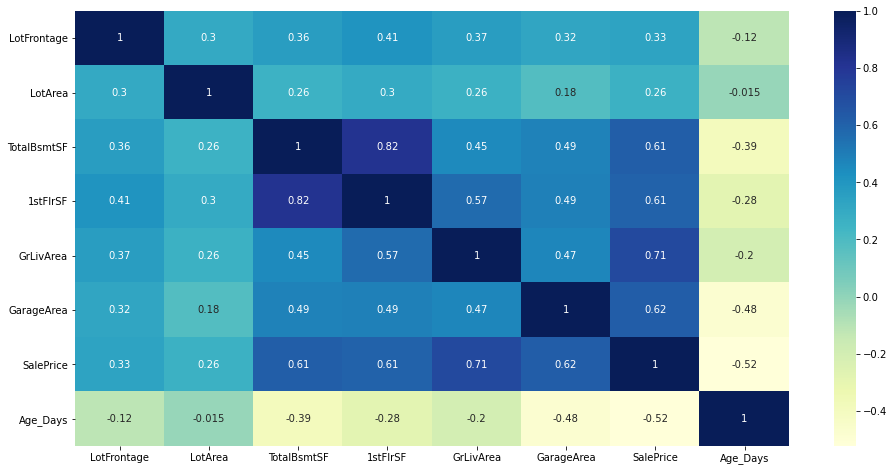

In [26]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:

- Price is highly (positively) correlated with Total Basement Surface Area, 1st Floor SF, Ground Living Area, Garage Area.

- Price is negatively correlated to Age of the dwelling.

Correlation among independent variables:

- Many independent variables are highly correlated like BasementSF and 1stFloor SF, GrLivArea and 2nd Floor SF.

Thus, while building the model, we'll have to pay attention to multicollinearity.

In [27]:
df_numeric.describe(percentiles=[.70,0.80,.90,.95,.97,.99,.999])

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,Age_Days
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1057.429452,1162.626712,1515.463699,472.980137,180921.195890,13532.295205
std,22.027677,9981.264932,438.705324,386.587738,525.480383,213.804841,79442.502883,11040.059029
min,21.000000,1300.000000,0.000000,334.000000,334.000000,0.000000,34900.000000,30.000000
50%,69.000000,9478.500000,991.500000,1087.000000,1464.000000,480.000000,163000.000000,12958.000000
70%,75.000000,11066.500000,1216.000000,1314.000000,1709.300000,560.000000,198620.000000,18645.000000
80%,80.000000,12205.800000,1391.200000,1482.400000,1869.000000,620.200000,230000.000000,22198.200000
90%,92.000000,14381.700000,1602.200000,1680.000000,2158.300000,757.100000,278000.000000,30699.200000
95%,104.000000,17401.150000,1753.000000,1831.250000,2466.100000,850.100000,326100.000000,33341.550000
97%,114.000000,21571.800000,1905.460000,1981.610000,2633.230000,884.000000,374230.000000,35463.060000


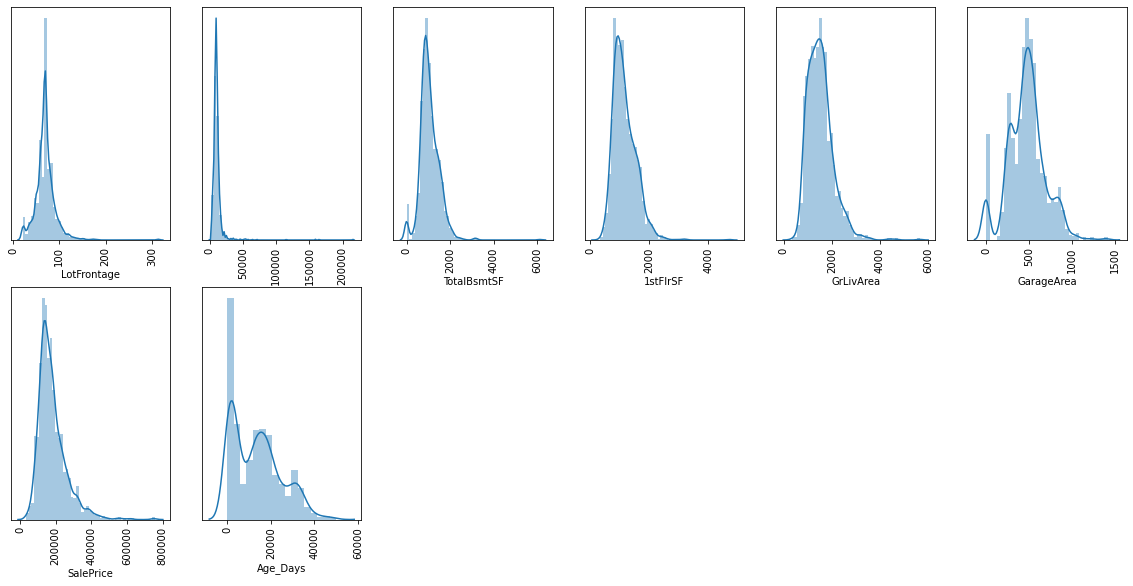

In [28]:
#understanding the distribution of Numerical columns 
plt.figure(figsize=(20,30))
for j in enumerate(df_numeric.columns):
    plt.subplot(6,6,j[0]+1)
    sns.distplot(df[j[1]])
    
    #sns.boxplot(j[1],data=df, orient='v')
    plt.xticks(rotation=90)
    plt.yticks([])
    plt.ylabel('')
  
    
    

Observation: As the numberical variable distribution is highly skewed, transforming the variable by log function 

In [29]:
#log transformation
for i in df_numeric.columns:
    df[i]=np.log(df[i])

In [30]:
# after conversion, log(0) value converted to -inf, calculating the % of values
print('TotalBsmtSF',len(df.loc[df.TotalBsmtSF==np.log(0),'TotalBsmtSF'])*100/len(df))
print('GarageArea',len(df.loc[df['GarageArea']==np.log(0),'GarageArea'])*100/len(df))


TotalBsmtSF 2.5342465753424657
GarageArea 5.5479452054794525


In [31]:
# after conversion, log(0) value converted to -inf, so replacing that value 0
df.loc[df.TotalBsmtSF==np.log(0),'TotalBsmtSF']=0
df.loc[df['GarageArea']==np.log(0),'GarageArea']=0


In [32]:
# from the list of categorical variables,creating dummies by excluding few columns 
#as they have a common attribute value like No basement and No Garage, gonna treat them seperatly
for i in mylist:
    if i not in ['BsmtExposure','BsmtQual','BsmtFinType1','GarageType','GarageFinish']:
        a=pd.get_dummies(df[i],drop_first=True,prefix=i)
        df=pd.concat((df,a),axis=1)

In [33]:
# dropping the original columns 
for i in mylist:
    if i not in ['BsmtExposure','BsmtQual','BsmtFinType1','GarageType','GarageFinish']:
        df.drop(columns=i,inplace=True)
        

In [34]:
# creating dummies for the remaining categorical columns
for i in ['BsmtExposure','BsmtQual','BsmtFinType1','GarageType','GarageFinish']:
    a=pd.get_dummies(df[i],prefix=i)
    df=pd.concat((df,a),axis=1)

In [35]:
# dropping the dupliate columns derived from below columns
for i in ['BsmtExposure','BsmtQual','BsmtFinType1']:#,'GarageType','GarageFinish']:
    
    df.drop(columns=i+'_NB',inplace=True)

    # dropping the dupliate columns derived from below columns
for i in ['GarageType','GarageFinish']:
    
    df.drop(columns=i+'_NG',inplace=True)

#dropping original columns which are used for deriving new    
for i in ['BsmtExposure','BsmtQual','BsmtFinType1','GarageType','GarageFinish']:
    
    df.drop(columns=i,inplace=True)
                    
        

### Train Test Split 

In [36]:
#importing the required libraries
from sklearn.model_selection import train_test_split

In [37]:
#splitting the data into train and test
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
df_train.head()

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
210,4.204693,8.631236,6.761573,6.761573,6.761573,0.000000,11.492723,...,0,0,0,0,0,0,0
318,4.499810,9.200290,7.205635,7.224025,7.880804,6.486161,12.468437,...,0,0,0,0,0,1,0
239,3.951244,9.075780,6.599870,6.682109,7.304516,5.393628,11.635143,...,0,0,0,1,0,0,1
986,4.077537,8.577347,6.184149,6.908755,7.399398,5.541264,11.669929,...,0,0,0,0,0,0,1
1416,4.094345,9.336092,6.655440,7.127694,7.736307,6.327937,11.715866,...,0,0,0,1,0,0,1


In [39]:
#scalling the numberical columns using minmax scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageArea', 'SalePrice', 'Age_Days'],
      dtype='object')

In [41]:
vars=['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageArea',  'Age_Days']

In [42]:
#transformaing the variables into scalled and the resultant values are in the range between 0 and 1
df_train[vars]=scaler.fit_transform(df_train[vars])
df_test[vars]=scaler.transform(df_test[vars])

In [43]:
# subsetting the train data into target and predictor variables
y_train = df_train['SalePrice']
X_train= df_train.loc[:, df_train.columns !='SalePrice']
y_test = df_test['SalePrice']
X_test= df_test.loc[:, df_test.columns !='SalePrice']

### Model Selection and Evaluation

### Ridge Regression


In [44]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018394,0.006927,0.005628,0.001344,0.0001,{'alpha': 0.0001},-0.098006,...,-0.071133,-0.067649,-0.068248,-0.073387,-0.071852,-0.070454,0.002179
1,0.017393,0.001981,0.007245,0.002922,0.001,{'alpha': 0.001},-0.097988,...,-0.071136,-0.067652,-0.068251,-0.073388,-0.071858,-0.070457,0.002179
2,0.015284,0.003684,0.005445,0.001473,0.01,{'alpha': 0.01},-0.097815,...,-0.071159,-0.067676,-0.068284,-0.073405,-0.071919,-0.070489,0.002180
3,0.014739,0.002652,0.005282,0.002076,0.05,{'alpha': 0.05},-0.097193,...,-0.071280,-0.067855,-0.068457,-0.073514,-0.072179,-0.070657,0.002171
4,0.012384,0.003197,0.006784,0.002771,0.1,{'alpha': 0.1},-0.096678,...,-0.071416,-0.068084,-0.068702,-0.073678,-0.072478,-0.070872,0.002155


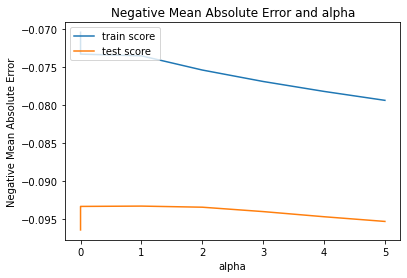

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
y_pred_t=ridge.predict(X_test)

Text(0.5, 0, 'Errors')

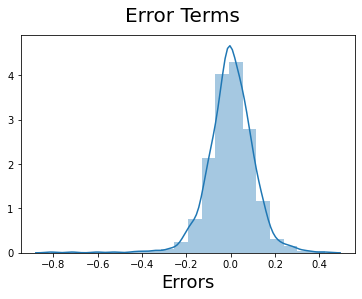

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [49]:
print(metrics.r2_score(y_train,y_pred))
print(metrics.r2_score(y_test,y_pred_t))

0.9269262493560049
0.8771077511906492


In [50]:
Colm_Imp=pd.DataFrame({'Columns':X_train.columns,'Attribute_Score': abs(ridge.coef_)})
Colm_Imp=Colm_Imp[Colm_Imp.Attribute_Score>0].sort_values('Attribute_Score',ascending=False).reset_index(drop=True)
Colm_Imp.head(10)

,Columns,Attribute_Score
0,GrLivArea,0.455584
1,1stFlrSF,0.268731
2,LotArea,0.222903
3,OverallQual_9,0.200309
4,TotalBsmtSF,0.187057
5,OverallQual_2,0.173481
6,OverallCond_3,0.168928
7,MSZoning_FV,0.166386
8,OverallCond_9,0.160181
9,MSZoning_RL,0.155395


In [51]:
Colm_Imp.shape

(188, 2)

### Lasso Regression

In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.110495,0.037301,0.004878,0.004004,0.0001,{'alpha': 0.0001},-0.093322,...,-0.072279,-0.069780,-0.070044,-0.074846,-0.074324,-0.072255,0.002098
1,0.024222,0.002830,0.005323,0.004069,0.001,{'alpha': 0.001},-0.094223,...,-0.083755,-0.081021,-0.079393,-0.085203,-0.085188,-0.082912,0.002328
2,0.128318,0.220524,0.005132,0.004201,0.01,{'alpha': 0.01},-0.122957,...,-0.133354,-0.132181,-0.130354,-0.131218,-0.132320,-0.131885,0.001022


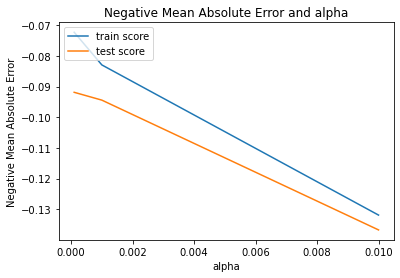

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        

lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
y_pred_t=lasso.predict(X_test)

Text(0.5, 0, 'Errors')

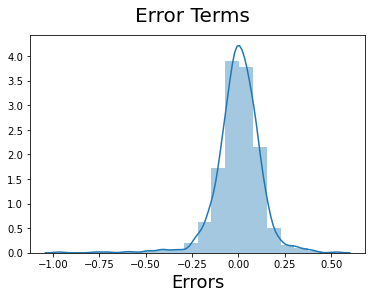

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Observation: Residuals are linearly distributed.

In [57]:
print(metrics.r2_score(y_train,y_pred))
print(metrics.r2_score(y_test,y_pred_t))

0.9062649950827072
0.8725319127232813


In [58]:
Colm_Imp=pd.DataFrame({'Columns':X_train.columns,'Attribute_Score': abs(lasso.coef_)})
Colm_Imp=Colm_Imp[Colm_Imp.Attribute_Score>0].sort_values('Attribute_Score',ascending=False).reset_index(drop=True)
Colm_Imp.head(10)

,Columns,Attribute_Score
0,GrLivArea,0.870046
1,OverallQual_9,0.206183
2,OverallCond_3,0.204884
3,TotalBsmtSF,0.184033
4,LotArea,0.178149
5,OverallQual_8,0.134367
6,GarageArea,0.117249
7,BsmtQual_Ex,0.109842
8,OverallQual_10,0.106640
9,Fireplaces_2,0.094643


In [59]:
Colm_Imp.shape

(76, 2)

In [60]:
top5=['GrLivArea','OverallQual_9','OverallCond_3','TotalBsmtSF','LotArea']

In [61]:
rem=[]
for i in X_train.columns:
    if i not in top5:
        rem.append(i)

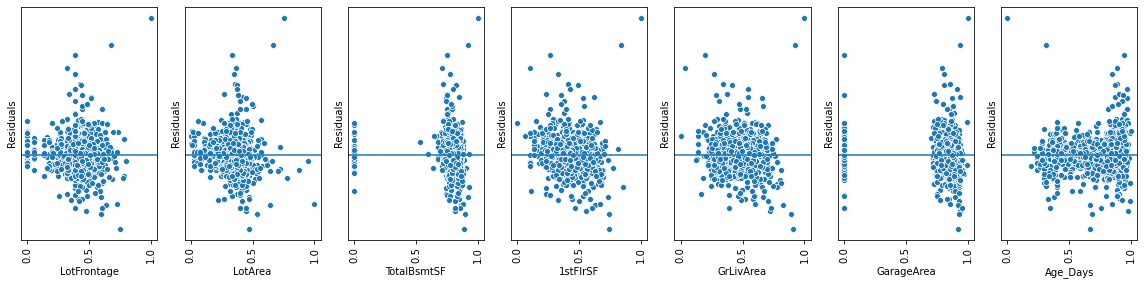

In [62]:
#understanding the distribution of Numerical columns 
plt.figure(figsize=(20,30))
for j in enumerate(vars):
    plt.subplot(6,7,j[0]+1)
    sns.scatterplot(y=y_pred-y_train,x=j[1],data=X_train)
    plt.axhline(y=0)
    #sns.boxplot(j[1],data=df, orient='v')
    plt.xticks(rotation=90)
    plt.yticks([])
    plt.ylabel('Residuals')
  
    
    

Observation: The residuals of the model vs independent variables shows homoscedastic nature – low variance and low bias.

In [63]:
df_numeric = df_train[list(Colm_Imp.Columns)+['SalePrice']].select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,GrLivArea,TotalBsmtSF,LotArea,GarageArea,1stFlrSF,Age_Days,SalePrice
210,0.265811,0.775616,0.267670,0.000000,0.332454,0.932991,11.492723
318,0.703734,0.826554,0.381897,0.893780,0.514901,0.713329,12.468437
239,0.478249,0.757067,0.356904,0.743231,0.301104,0.900189,11.635143
986,0.515374,0.709380,0.256853,0.763575,0.390521,0.952761,11.669929
1416,0.647196,0.763442,0.409157,0.871977,0.476897,0.988004,11.715866


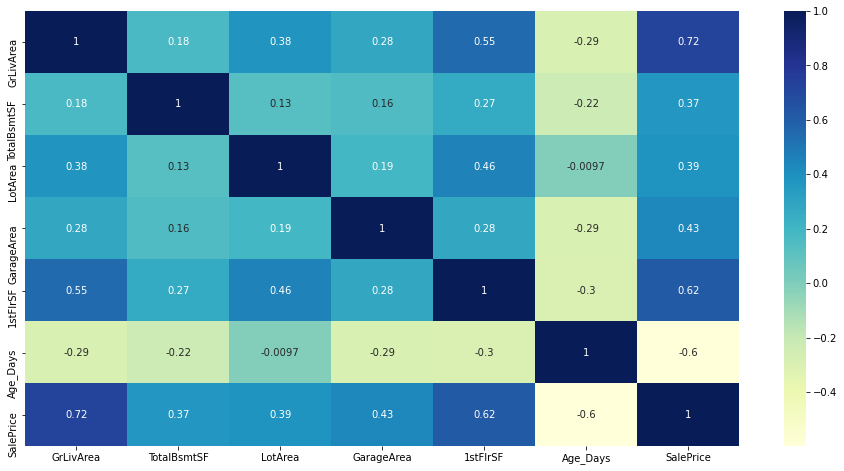

In [64]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()


Observation : 
   - There is no multicollinearity between the independent variables.
   - And from above heatmap, we can say the independent variables are linearly correlated with target variable.

Conclusion : Final Model : Lasso Regression.
    
    Considering the no of model independent variables, difference between train and test scores, choosing Lasso Regession as final Model.
    Below are most important 10 independent variables impacting House prices in Australian Market.
    

In [65]:
Colm_Imp.head(10)

,Columns,Attribute_Score
0,GrLivArea,0.870046
1,OverallQual_9,0.206183
2,OverallCond_3,0.204884
3,TotalBsmtSF,0.184033
4,LotArea,0.178149
5,OverallQual_8,0.134367
6,GarageArea,0.117249
7,BsmtQual_Ex,0.109842
8,OverallQual_10,0.106640
9,Fireplaces_2,0.094643
